<a href="https://colab.research.google.com/github/naidu199/CodeWay-ML-/blob/main/Movie_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
train_path= "/content/drive/MyDrive/FML_DATA_SETS/Genre Classification Dataset/train_data.txt"
raw_data = pd.read_csv(train_path, sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"], engine="python")



In [66]:
raw_data.head(10)

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."
10,Spirits (2014/I),horror,Four high school students embark on a terrify...


In [67]:
raw_data.shape

(54214, 3)

In [68]:
raw_data.describe()

,TITLE,GENRE,DESCRIPTION
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [69]:
raw_data['GENRE'].value_counts()

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: GENRE, dtype: int64

In [70]:
data=raw_data.iloc[:8214]

In [71]:
data.shape

(8214, 3)

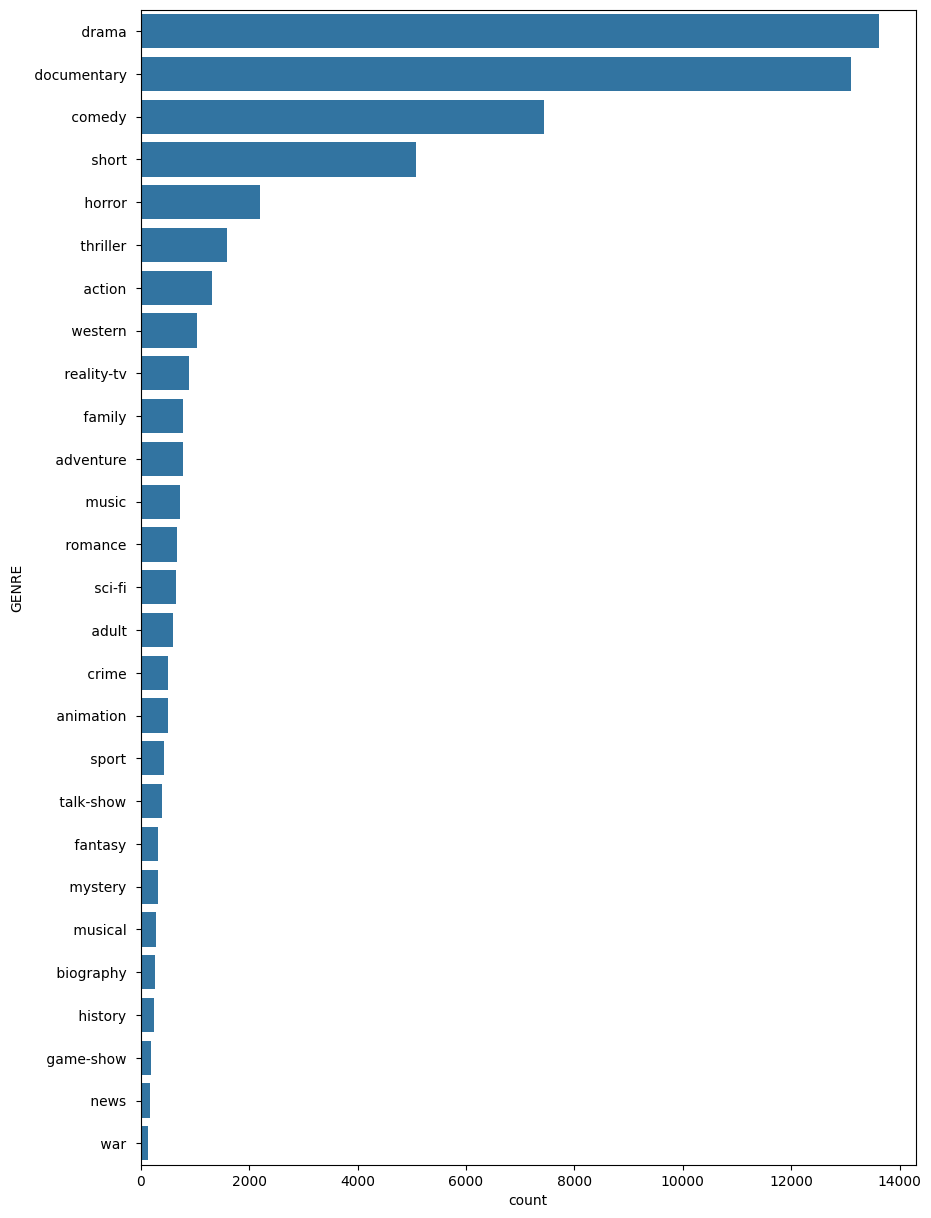

In [72]:
plt.figure(figsize=(10,15))
sns.countplot(data=raw_data, y="GENRE", order= raw_data["GENRE"].value_counts().index)
plt.show()

In [73]:
data["GENRE"].value_counts().index

Index([' drama ', ' documentary ', ' comedy ', ' short ', ' horror ',
       ' thriller ', ' action ', ' western ', ' reality-tv ', ' family ',
       ' adventure ', ' music ', ' sci-fi ', ' adult ', ' romance ',
       ' animation ', ' sport ', ' crime ', ' talk-show ', ' fantasy ',
       ' mystery ', ' biography ', ' musical ', ' history ', ' game-show ',
       ' news ', ' war '],
      dtype='object')

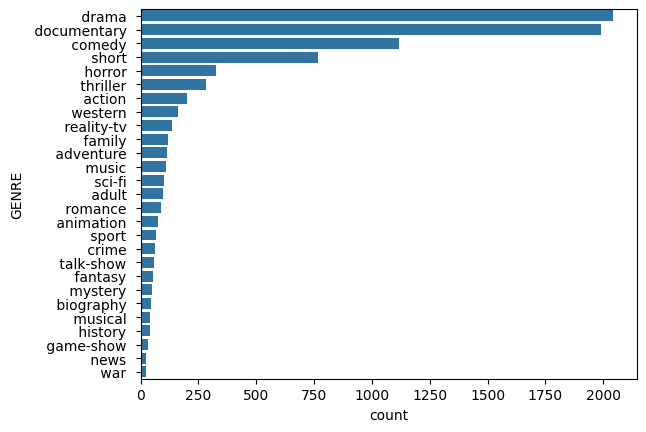

In [74]:
# plt.figure(figsize=(10,15))
sns.countplot(data=data, y="GENRE", order= data["GENRE"].value_counts().index)
plt.show()

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8214 entries, 1 to 8214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        8214 non-null   object
 1   GENRE        8214 non-null   object
 2   DESCRIPTION  8214 non-null   object
dtypes: object(3)
memory usage: 256.7+ KB


In [76]:
data['GENRE'].value_counts()

 drama           2042
 documentary     1989
 comedy          1115
 short            768
 horror           327
 thriller         281
 action           199
 western          160
 reality-tv       134
 family           118
 adventure        114
 music            110
 sci-fi           100
 adult             97
 romance           89
 animation         74
 sport             67
 crime             64
 talk-show         58
 fantasy           54
 mystery           50
 biography         45
 musical           42
 history           41
 game-show         32
 news              23
 war               21
Name: GENRE, dtype: int64

Data Preprocessing

1.Removing null values

2.cleaning special character's

3.convert to lower case

4.Tokenizing (spliting the text into words)

5.Removing stop words (removing words like "if,and,or,the etc..")

6.Stemming (converting word into it's root word)






In [77]:
data.isna().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [78]:
!pip install --user -U nltk

In [79]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [80]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))

def cleaning_data(text):
    text = text.lower()
    text=re.sub(r'-',' ',text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub('[^A-Za-z\s]', '', text)
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in string.punctuation and word not in stop_words]
    root_words = [stemmer.stem(word) for word in words]
    cleaned_text = " ".join(root_words)

    return cleaned_text


In [81]:
data['Cleaned_Description ']=data['DESCRIPTION'].apply(cleaning_data)

<ipython-input-81-5874a0cc77de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cleaned_Description ']=data['DESCRIPTION'].apply(cleaning_data)


In [82]:
data.head(10)

,TITLE,GENRE,DESCRIPTION,Cleaned_Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listen convers doctor parent year old oscar le...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestu relationship curre...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bu empti student field trip museum natur histo...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemploy father make end meet edith twin ...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film titl refer un recov bodi ground zero also...
6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...,qualiti control consist seri mm singl take sho...
7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...,tough econom time max joey run idea discov sen...
8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...,ron petri keanu reev troubl teen whose life ha...
9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss...",sudden calamit event caus great loss life dama...
10,Spirits (2014/I),horror,Four high school students embark on a terrify...,four high school student embark terrifi journe...


Vectorization

TF-IDF vectorizer (used to convert the text to meaning representation of numbers to train the model)

TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(data['Cleaned_Description '])
Y=data['GENRE']

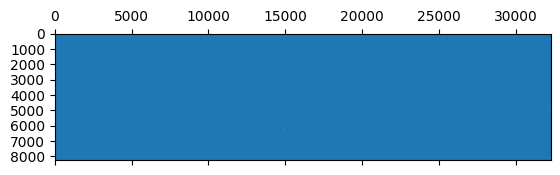

In [84]:
plt.spy(X,markersize=1)
plt.show()

In [85]:
dense_matrix=X.toarray()
dense_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [86]:
from sklearn.model_selection import  train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.22,random_state=0)

In [87]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(xtrain,ytrain)

MultinomialNB()

In [88]:
ypred=classifier.predict(xtest)
# ypred

<Axes: >

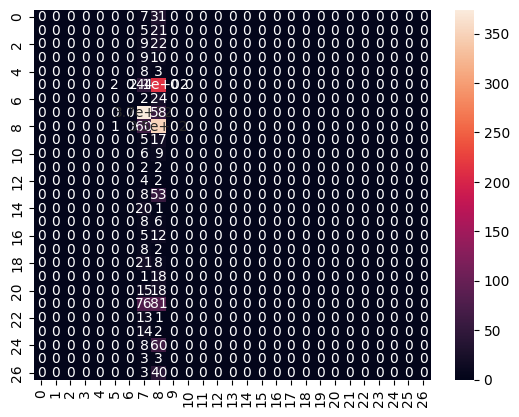

In [89]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(ytest,ypred)
sns.heatmap(matrix,annot= True)

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.4021017699115044

In [91]:
classifier.score(xtrain,ytrain)

0.4848579456759288

In [92]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf', C=1, gamma=1)
clf.fit(xtrain,ytrain)

SVC(C=1, gamma=1)

In [93]:
y_pred=clf.predict(xtest)

In [94]:
accuracy_score(ytest,y_pred)


0.4435840707964602

In [50]:
from sklearn.svm import SVC
clf1 = SVC(kernel='linear',C=1)
clf1.fit(xtrain,ytrain)

SVC(C=1, kernel='linear')

In [51]:
y_pred1=clf.predict(xtest)
accuracy_score(ytest,y_pred1)

0.5086206896551724

In [99]:
from sklearn.svm import LinearSVC
lsvc=LinearSVC()
lsvc.fit(xtrain,ytrain)
y_pred2=lsvc.predict(xtest)
accuracy_score(ytest,y_pred2)

0.5099557522123894

In [100]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred2))

               precision    recall  f1-score   support

      action        0.47      0.24      0.32        38
       adult        0.50      0.23      0.32        26
   adventure        0.75      0.10      0.17        31
   animation        0.00      0.00      0.00        19
   biography        0.00      0.00      0.00        11
      comedy        0.52      0.51      0.51       258
       crime        0.00      0.00      0.00        26
 documentary        0.59      0.84      0.70       432
       drama        0.45      0.69      0.55       412
      family        0.00      0.00      0.00        22
     fantasy        0.00      0.00      0.00        15
   game-show        1.00      0.75      0.86         4
     history        0.00      0.00      0.00         6
      horror        0.52      0.52      0.52        61
       music        0.75      0.14      0.24        21
     musical        0.00      0.00      0.00        14
     mystery        0.00      0.00      0.00        17
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

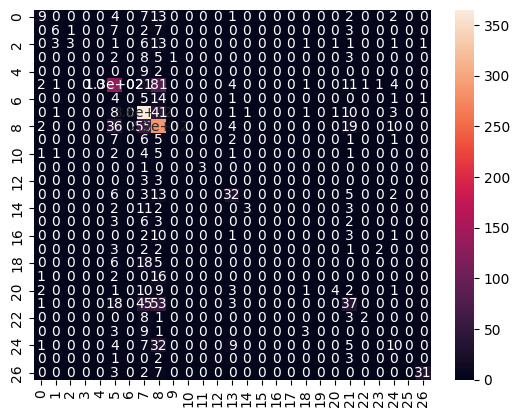

In [101]:
cfm=confusion_matrix(ytest,y_pred2)
sns.heatmap(cfm,annot= True)